In this notebook we explore the emission line measurements from the GAMA DR3: 
http://www.gama-survey.org/dr3/schema/dmu.php?id=8

In [1]:
import numpy as np 
# -- feasibgs -- 
from feasibgs import util as UT
from feasibgs import catalogs as Cat

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in GAMA-Legacy catalog

In [3]:
# read in GAMA-Legacy catalog for the G09, G12, and G15 fields
cata = Cat.GamaLegacy()
#fields = ['g09', 'g12', 'g15']
#glegs = []
#for field in fields: 
field = 'g15'
gleg = cata.Read(field)
cataid = gleg['gama-photo']['cataid'] # GAMA catalog id of each object
ngal = len(cataid)
print('%i galaxies in %s' % (ngal, field.upper()))
#glegs.append(gleg)

63004 galaxies in G15


The following 12 emission lines are measured using a simple Gaussian fit

In [4]:
emline_keys = ['oiib', 'oiir', 'hb',  'oiiib', 'oiiir', 'oib', 'oir', 'niib', 'ha', 'niir', 'siib', 'siir']
emline_lambda = [3726., 3729., 4861., 4959., 5007., 6300., 6364., 6548., 6563., 6583., 6717., 6731.]

Lets take a look at the line flux distributions for a few of the emission line groups

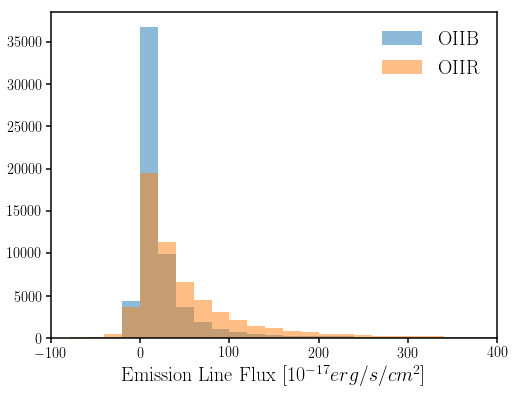

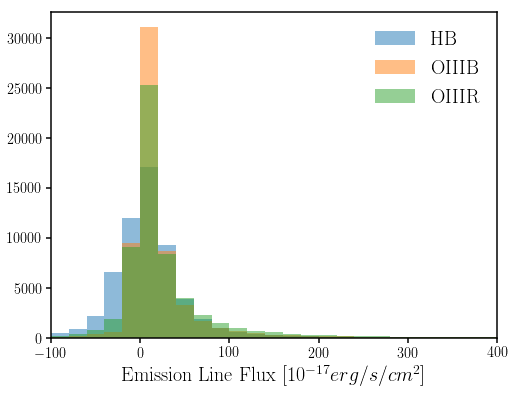

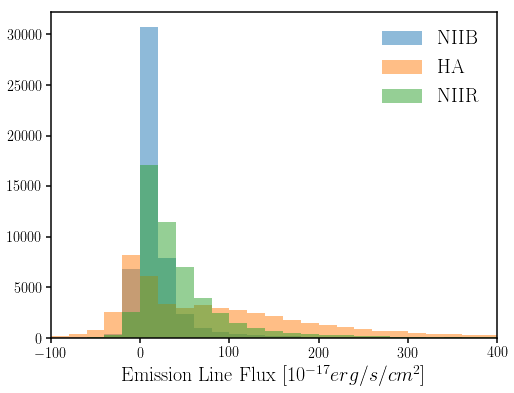

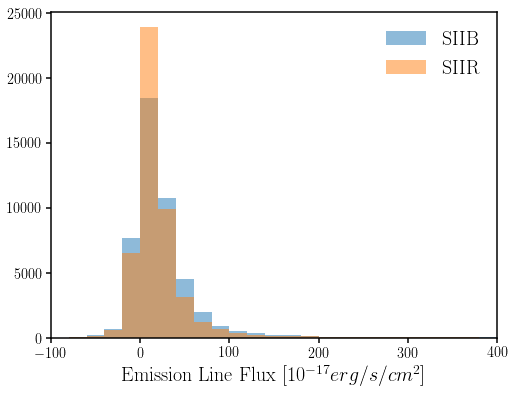

In [17]:
emline_groups = [[0,1], [2,3,4], [7,8,9], [10,11]]
for emline_group in emline_groups: 
    fig = plt.figure(figsize=(8,6))
    sub = fig.add_subplot(111)
    for i_k in emline_group: # OIII and Hbeta
        em_flux = gleg['gama-spec'][emline_keys[i_k]+'_flux']
        neg = (em_flux <= 0.) 
        _ = sub.hist(em_flux, range=(-1e3, 1e3), bins=100, alpha=0.5, label=emline_keys[i_k].upper())
        #_ = sub.hist(em_flux[np.invert(neg)], range=(-1e3, 1e3), bins=100)
        sub.set_xlim([-1e2, 4e2])
    sub.set_xlabel('Emission Line Flux $[10^{-17}erg/s/cm^2]$', fontsize=20)
    sub.legend(loc='upper right', prop={'size': 20})

Lets now examine the widths of these emission lines derived from a simple Gaussian fit

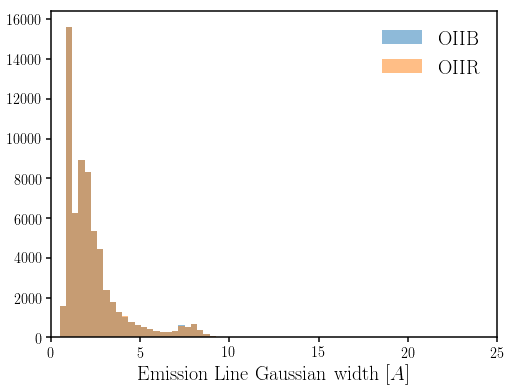

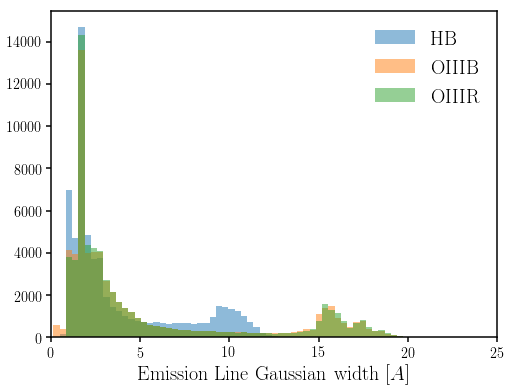

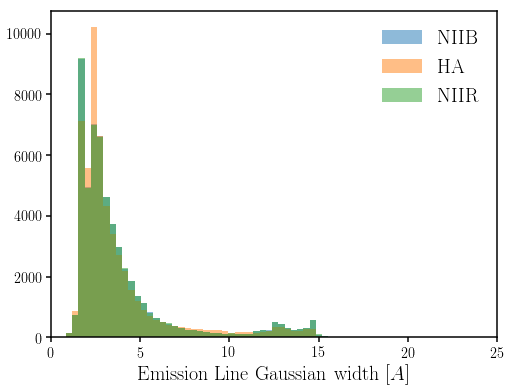

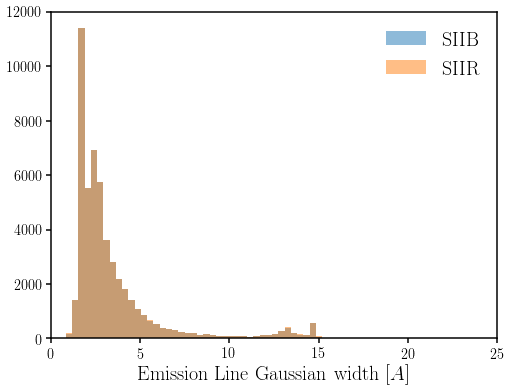

In [20]:
emline_groups = [[0,1], [2,3,4], [7,8,9], [10,11]]
for emline_group in emline_groups: 
    fig = plt.figure(figsize=(8,6))
    sub = fig.add_subplot(111)
    for i_k in emline_group: # OII lines
        em_flux = gleg['gama-spec']['sig_'+emline_keys[i_k]]
        neg = (em_flux <= 0.) 
        _ = sub.hist(em_flux, range=(-10, 25), bins=100, alpha=0.5, label=emline_keys[i_k].upper())
        #_ = sub.hist(em_flux[np.invert(neg)], range=(-1e3, 1e3), bins=100)
        sub.set_xlim([0., 2.5e1])
    sub.set_xlabel(r'Emission Line Gaussian width $[A]$', fontsize=20)
    sub.legend(loc='upper right', prop={'size': 20})


The emission line flux and width distributions of the doublet lines confirm that their positions, sigma, and amplitude are tied to the stronger one: 


Name     Wavelength   Comment

--------------------------------------

OIIB      3726	   Tied position, amplitude (0.35*OIIR) and sigma with OIIR, emission only

OIIR	  3729	   Emission only

Hbeta	  4861	   Narrow or broad emission and absorption allowed, fitted concurrently with OIIIB/R

OIIIB	  4959	   Tied position and sigma with OIIIR, emission only

OIIIR	  5007	   Emission only

OIB	  6300	   Tied position and sigma with OIR, emission only

OIR	  6364	   Emission only

NIIB	  6548	   Tied position and sigma with NIIR, emission only
 
Halpha	  6563	   Narrow or broad emission and absorption allowed, fitted concurrently with NIIB/R

NIIR	  6583	   Emission only

SIIB	  6717	   Tied position and sigma with SIIR, emission only

SIIR	  6731	   Emission only

In [18]:
print gleg['gama-spec']['sig_oiib'][:10]
print gleg['gama-spec']['sig_oiir'][:10]

[1.1263231 2.2754874 1.8370357 1.7405653 8.181321  5.412924  1.1245203
 2.9635491 1.8496778 1.1245203]
[1.1260084 2.275954  1.8372581 1.7410429 8.183708  5.414013  1.1242038
 2.9643478 1.8499079 1.1242038]


Instead of the width in angstroms, lets calculate the velocity dispersions of the emission lines. This is particularly important because the galaxy templates in `redrock` only go up to velocity dispersions of $200\,km/s$.

$$\frac{\Delta \lambda}{\lambda_{obv}} = z = \frac{v}{c}$$

oiib 0.150600
oiir 0.150273
hb 0.068735
oiiib 0.350970
oiiir 0.246350
niib 0.150586
ha 0.048264
niir 0.141102
siib 0.086909
siir 0.083860


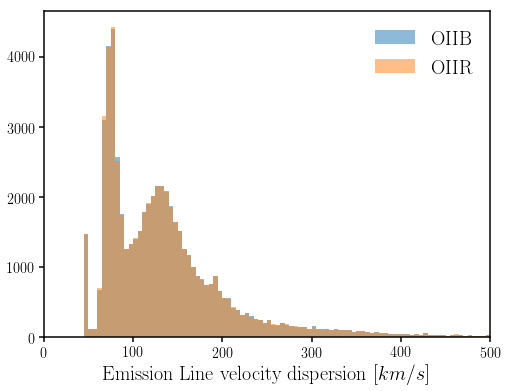

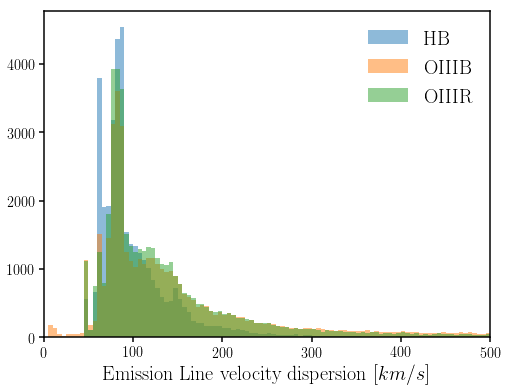

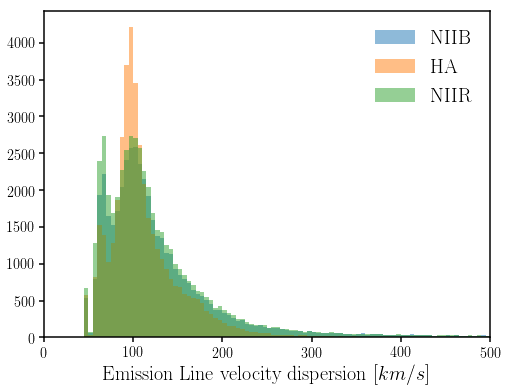

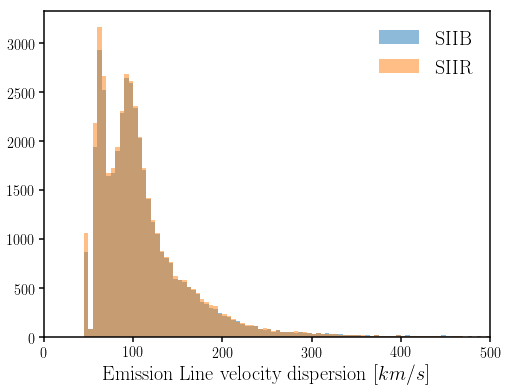

In [26]:
c_light = 299792.458 #km/s
emline_groups = [[0,1], [2,3,4], [7,8,9], [10,11]]
for emline_group in emline_groups: 
    fig = plt.figure(figsize=(8,6))
    sub = fig.add_subplot(111)
    for i_k in emline_group: # OII lines
        has_emline = (gleg['gama-spec'][emline_keys[i_k]+"_flux"] > 0)
        em_width = gleg['gama-spec']['sig_'+emline_keys[i_k]]
        em_vdisp = (em_width * c_light / (emline_lambda[i_k] * (1+gleg['gama-spec']['z'])))[has_emline]
        f_highvdisp = float(np.sum(em_vdisp > 200.))/float(len(em_vdisp))
        print('%s %f' % (emline_keys[i_k], f_highvdisp))
        _ = sub.hist(em_vdisp, range=(0, 5e2), bins=100, alpha=0.5, label=emline_keys[i_k].upper())
        sub.set_xlim([0., 5e2])
    sub.set_xlabel(r'Emission Line velocity dispersion $[km/s]$', fontsize=20)
    sub.legend(loc='upper right', prop={'size': 20})

In [39]:
for k in emline_keys: 
    em_flux_all, em_sig_all = [], [] 
    for i, gleg in enumerate(glegs): 
        em_flux_all.append(gleg['gama-spec'][k+'_flux']) 
        em_sig_all.append(gleg['gama-spec']['sig_'+k]) 
    em_flux_all = np.concatenate(em_flux_all)
    em_sig_all = np.concatenate(em_sig_all)

    # em line with no width
    nowidth = (em_sig_all <= 0.)
    assert em_sig_all[nowidth].min() == -99999.
    assert em_sig_all[nowidth].max() == -99999.
    print('%i galaxies have less than or equal 0 %s line width (%f)' % (np.sum(neg), k.upper(), float(np.sum(neg))/float(len(em_flux_all))))
    print('line flux of galaxies with no line width ranges from %f to %f' % (em_flux_all[nowidth].min(), em_flux_all[nowidth].max()))    
    print('--------------------------------')

18715 galaxies have less than or equal 0 OIIB line width (0.158693)
line flux of galaxies with no line width ranges from -99999.000000 to -99999.000000
--------------------------------
18715 galaxies have less than or equal 0 OIIR line width (0.158693)
line flux of galaxies with no line width ranges from -99999.000000 to -99999.000000
--------------------------------
18715 galaxies have less than or equal 0 HB line width (0.158693)
line flux of galaxies with no line width ranges from -99999.000000 to -99999.000000
--------------------------------
18715 galaxies have less than or equal 0 OIIIB line width (0.158693)
line flux of galaxies with no line width ranges from -99999.000000 to -99999.000000
--------------------------------
18715 galaxies have less than or equal 0 OIIIR line width (0.158693)
line flux of galaxies with no line width ranges from -99999.000000 to -99999.000000
--------------------------------
18715 galaxies have less than or equal 0 OIB line width (0.158693)
line flu

Galaxies that do not have a line width, also do not have emission line fluxes. Therefore we don't have to worry about some adhoc prescription for line widhts. 